# Chrnoic Kidney Disease Prediction - Using Machine Learning

Chronic Kidney Disease (CKD) or chronic renal disease has become a major issue with a steady growth rate. A person can only survive without kidneys for an average time of 18 days, which makes a huge demand for a kidney transplant and Dialysis. It is important to have effective methods for early prediction of CKD. Machine learning methods are effective in CKD prediction. This work proposes a workflow to predict CKD status based on clinical data, incorporating data prepossessing, a missing value handling method with collaborative filtering and attributes selection. Out of the 11 machine learning methods considered, the extra tree classifier and random forest classifier are shown to result in the highest accuracy and minimal bias to the attributes. The research also considers the practical aspects of data collection and highlights the importance of incorporating domain knowledge when using machine learning for CKD status prediction.

![image.png](https://www.healio.com/~/media/slack-news/stock-images/rheumatology/rheum-images/kidney.jpeg)

## Machine Learning Approach to Predict the  Chronic Kidney Disease

It identifies the limitations in handling missing values when analysing CKD data, proposes a new method to handle missing values and presents the evaluation of different methods based on UCI dataset. Further, this work also highlights the importance of statistical analysis as well as the domain knowledge of the features when making a
prediction based on clinical data related to CKD.

**chronic renal disease, machine learning, classification algorithms, extra tree classifier, random forest classifier,XGBoost**




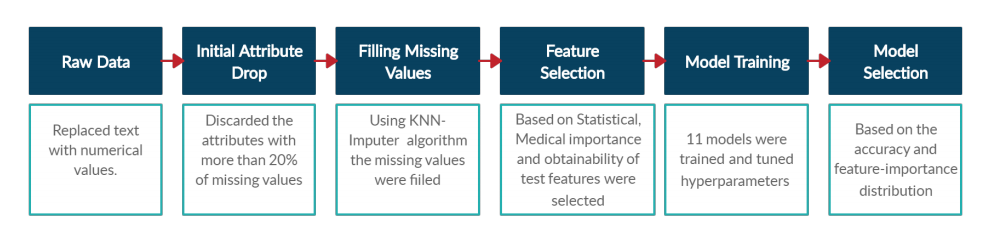

# Data set we contains

1. age - age
2. bp - blood pressure
3. sg - specific gravity
4. al - albumin
5. su - sugar
6. rbc - red blood cells
7. pc - pus cell
8. pcc - pus cell clumps
9. ba - bacteria
10. bgr - blood glucose random
11. bu - blood urea
12. sc - serum creatinine
13. sod - sodium
14. pot - potassium
15. hemo - haemoglobin
16. pcv - packed cell volume
17. wc - white blood cell count
18. rc - red blood cell count
19. htn - hypertension
20. dm - diabetes mellitus
21. cad - coronary artery disease
22. appet - appetite
23. pe - pedal edema
24. ane - anemia
25. lassification - class

# Feature description of the Data

1. Age(numerical) --> age in years
2. Blood Pressure(numerical) bp in mm/Hg
3. Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025)
4. Albumin(nominal)al - (0,1,2,3,4,5)
5. Sugar(nominal) su - (0,1,2,3,4,5)
6. Red Blood Cells(nominal) rbc - (normal,abnormal)
7. Pus Cell (nominal)pc - (normal,abnormal)
8. Pus Cell clumps(nominal)pcc - (present,notpresent)
9. Bacteria(nominal) ba - (present,notpresent)
10. Blood Glucose Random(numerical) bgr in mgs/dl
11. Blood Urea(numerical) bu in mgs/dl
12. Serum Creatinine(numerical) sc in mgs/dl
13. Sodium(numerical) sod in mEq/L
14. Potassium(numerical) pot in mEq/L
15. Haemoglobin(numerical) hemo in gms
16. Packed Cell Volume(numerical)
17. White Blood Cell Count(numerical) wc in cells/cumm
18. Red Blood Cell Count(numerical) rc in millions/cmm
19. Hypertension(nominal) htn - (yes,no)
20. Diabetes Mellitus(nominal) dm - (yes,no)
21. Coronary Artery Disease(nominal) cad - (yes,no)
22. Appetite(nominal) ppet - (good,poor)
23. Pedal Edema(nominal) pe - (yes,no)
24. Anemia(nominal)ane - (yes,no)
25. Class (nominal) class - (ckd,notckd)

## Install & Importing the Dependencies

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Extract the Data-Set ( Kidney_Disease.csv )

In [132]:
kidney=pd.read_csv('kidney_disease.csv')

In [133]:
kidney.shape

(400, 26)

- It Indicates there are about **400** Rows and **26** Columns are present in our Data Set

In [134]:
kidney.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [135]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [136]:
kidney.describe()

id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006    5.741126   10.408752    3.193904    2.912587  
min     22.000000    1.500000    0.400000    4.500000    2.500000    3.100000  
25%     99.000000   27.000000    0.900000  135.000000    3.800000   10.300000  
50%    121.000000   42.000000    1.300000  138.000000    4.400000   12.650000  
75%    163.000000   66.000000    2.800000  142.000000    4.900000   15.000000  
max    490.000000  391.000000   76.000000  163.000000   47.000000   17.800000

# Performing Exploitory Data Analysis ( EDA )
- Modifying the Column Names as per our requirements

In [137]:
kidney=kidney.rename(columns={'id':'id','age':'age','bp':'blood pressure','sg':'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','...':'...','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'ypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anecdotal''anemia','classification':'class'})

In [138]:
kidney.head()

id   age  blood pressure  specific gravity  albumin  sugar red blood cells  \
0   0  48.0            80.0             1.020      1.0    0.0             NaN   
1   1   7.0            50.0             1.020      4.0    0.0             NaN   
2   2  62.0            80.0             1.010      2.0    3.0          normal   
3   3  48.0            70.0             1.005      4.0    0.0          normal   
4   4  51.0            80.0             1.010      2.0    0.0          normal   

   pus cell pus cell clumps    bacteria  ...  packed cell volume  \
0    normal      notpresent  notpresent  ...                  44   
1    normal      notpresent  notpresent  ...                  38   
2    normal      notpresent  notpresent  ...                  31   
3  abnormal         present  notpresent  ...                  32   
4    normal      notpresent  notpresent  ...                  35   

   white blood cell count  red blood cell count  ypertension  \
0                    7800                   5.2          yes   
1                    6000                   NaN           no   
2                    7500                   NaN           no   
3                    6700                   3.9          yes   
4                    7300                   4.6           no   

   diabetes mellitus  coronary artery disease appetite pedal edema  \
0                yes                       no     good          no   
1                 no                       no     good          no   
2                yes                       no     poor          no   
3                 no                       no     poor         yes   
4                 no                       no     good          no   

  anecdotalanemia class  
0              no   ckd  
1              no   ckd  
2             yes   ckd  
3             yes   ckd  
4              no   ckd  

[5 rows x 26 columns]

In [139]:
kidney.describe().T

count        mean         std     min     25%     50%  \
id                400.0  199.500000  115.614301   0.000   99.75  199.50   
age               391.0   51.483376   17.169714   2.000   42.00   55.00   
blood pressure    388.0   76.469072   13.683637  50.000   70.00   80.00   
specific gravity  353.0    1.017408    0.005717   1.005    1.01    1.02   
albumin           354.0    1.016949    1.352679   0.000    0.00    0.00   
sugar             351.0    0.450142    1.099191   0.000    0.00    0.00   
bgr               356.0  148.036517   79.281714  22.000   99.00  121.00   
bu                381.0   57.425722   50.503006   1.500   27.00   42.00   
sc                383.0    3.072454    5.741126   0.400    0.90    1.30   
sod               313.0  137.528754   10.408752   4.500  135.00  138.00   
pot               312.0    4.627244    3.193904   2.500    3.80    4.40   
hemo              348.0   12.526437    2.912587   3.100   10.30   12.65   

                     75%      max  
id                299.25  399.000  
age                64.50   90.000  
blood pressure     80.00  180.000  
specific gravity    1.02    1.025  
albumin             2.00    5.000  
sugar               0.00    5.000  
bgr               163.00  490.000  
bu                 66.00  391.000  
sc                  2.80   76.000  
sod               142.00  163.000  
pot                 4.90   47.000  
hemo               15.00   17.800

In [141]:
def convert_dtype(kidney,feature):
    kidney[feature]=pd.to_numeric(kidney[feature],errors='coerce')    #whereever we have Nan values , this errors parameter will hanfle that 

In [142]:
features=['packed cell volume','white blood cell count','red blood cell count']
for i in features:
    try:
        convert_dtype(kidney,i)
    except KeyError:
        print(f"{i} unknown")

In [143]:
kidney.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
pus cell                    object
pus cell clumps             object
bacteria                    object
bgr                        float64
bu                         float64
sc                         float64
sod                        float64
pot                        float64
hemo                       float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anecdotalanemia             object
class                       object
dtype: object

In [144]:
kidney.drop('id',inplace=True,axis=1)

# Performing Data cleaning

In [145]:
def extract_cat_num(kidney):
    cat_col=[col for col in kidney.columns if kidney[col].dtype=='O']
    num_col=[col for col in kidney.columns if kidney[col].dtype!='O']
    return cat_col,num_col

In [146]:
cat_col,num_col=extract_cat_num(kidney)

In [147]:
cat_col

['red blood cells',
 'pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anecdotalanemia',
 'class']

In [148]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [149]:
# dirtiness in categorical data
for col in cat_col:
    print('{} has {} values'.format(col,kidney[col].unique()))
    print("\n")

red blood cells has [nan 'normal' 'abnormal'] values


pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


coronary artery disease has ['no' 'yes' '\tno' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anecdotalanemia has ['no' 'yes' nan] values


class has ['ckd' 'ckd\t' 'notckd'] values




In [150]:
kidney['diabetes mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)
kidney['coronary artery disease'].replace(to_replace={'\tno':'no'},inplace=True)
kidney['class'].replace(to_replace={'ckd\t':'ckd'},inplace=True)

In [151]:
# no dirtiness
for col in cat_col:
    print('{} has {} values'.format(col,kidney[col].unique()))
    print("\n")

red blood cells has [nan 'normal' 'abnormal'] values


pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' nan] values


coronary artery disease has ['no' 'yes' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anecdotalanemia has ['no' 'yes' nan] values


class has ['ckd' 'notckd'] values




## Analysing distribution of each and every column

In [152]:
len(num_col)

14

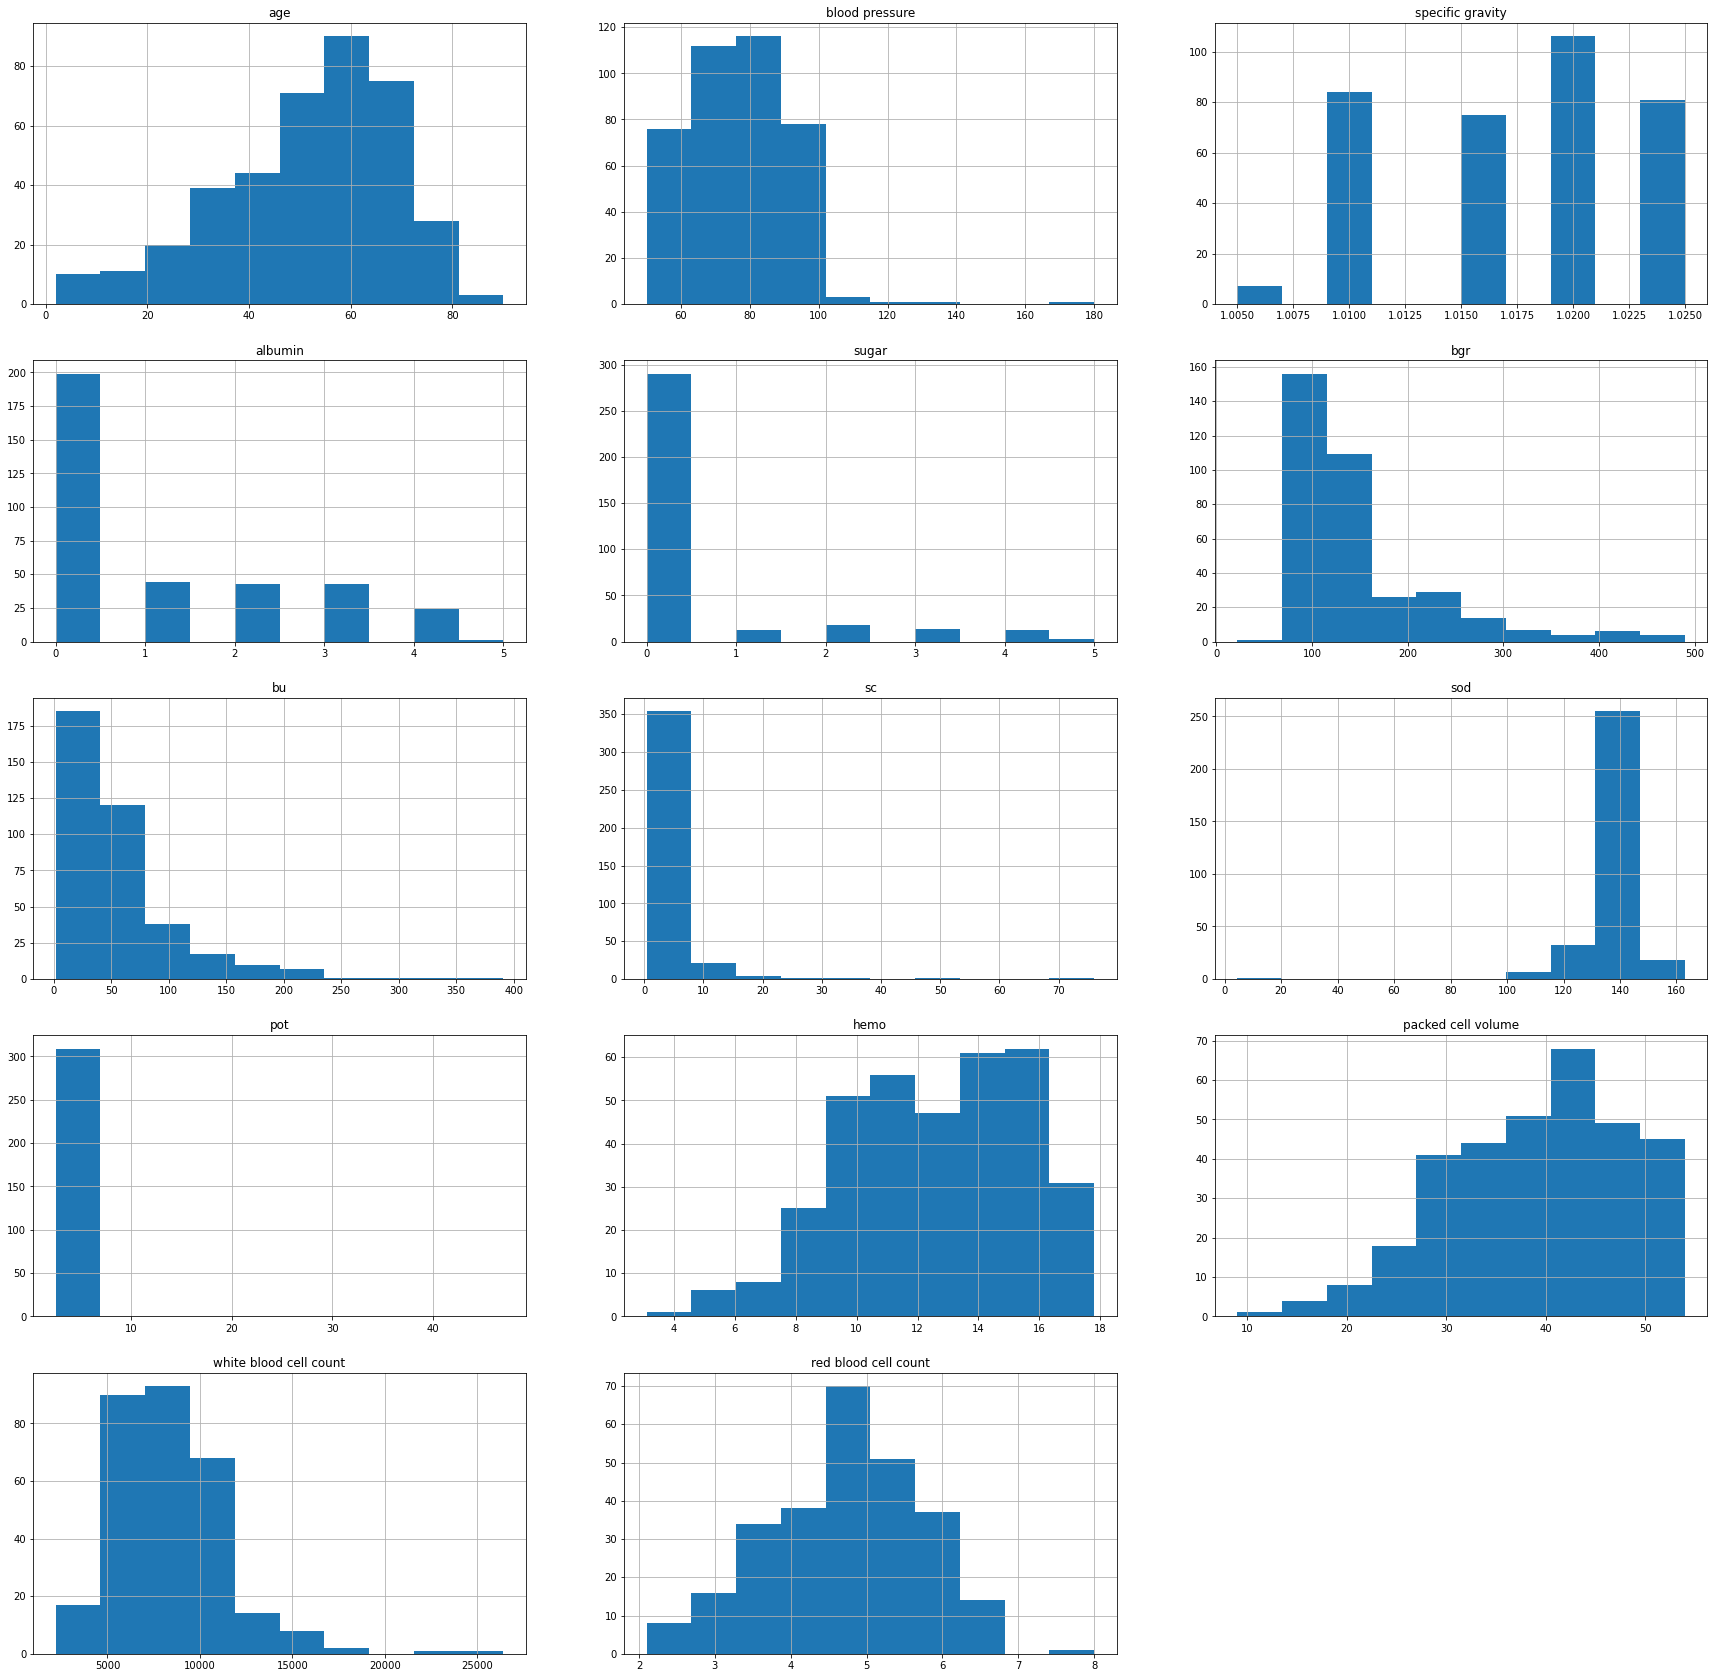

In [155]:
plt.figure(figsize=(30,30))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)   # 5 rows and 3 columns        
    kidney[feature].hist()
    plt.title(feature)

## Check Label distribution of categorical Data

In [158]:
len(cat_col)

11

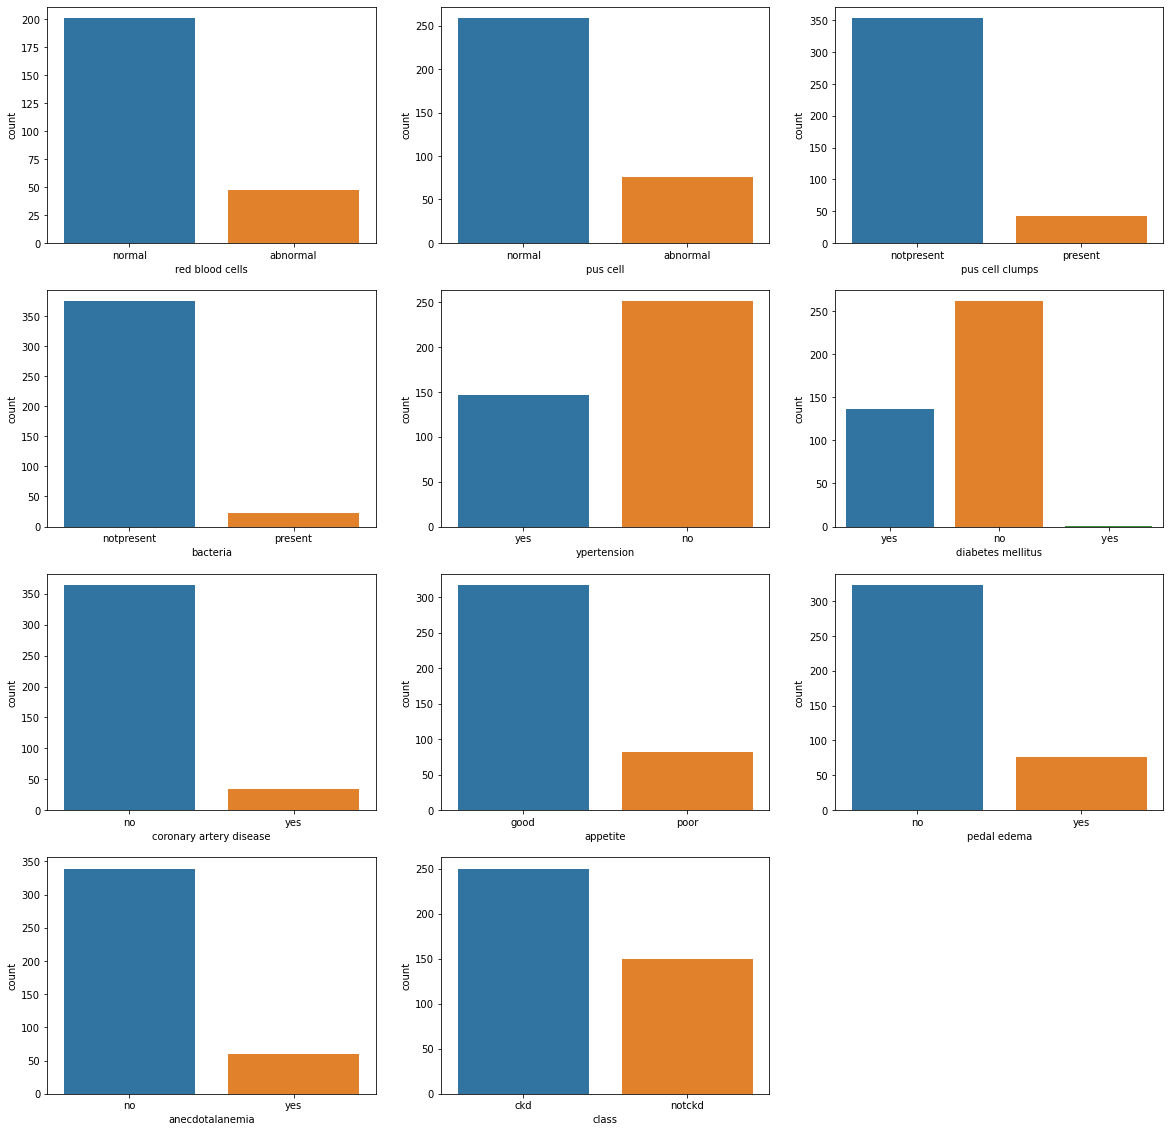

In [159]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(kidney[feature])

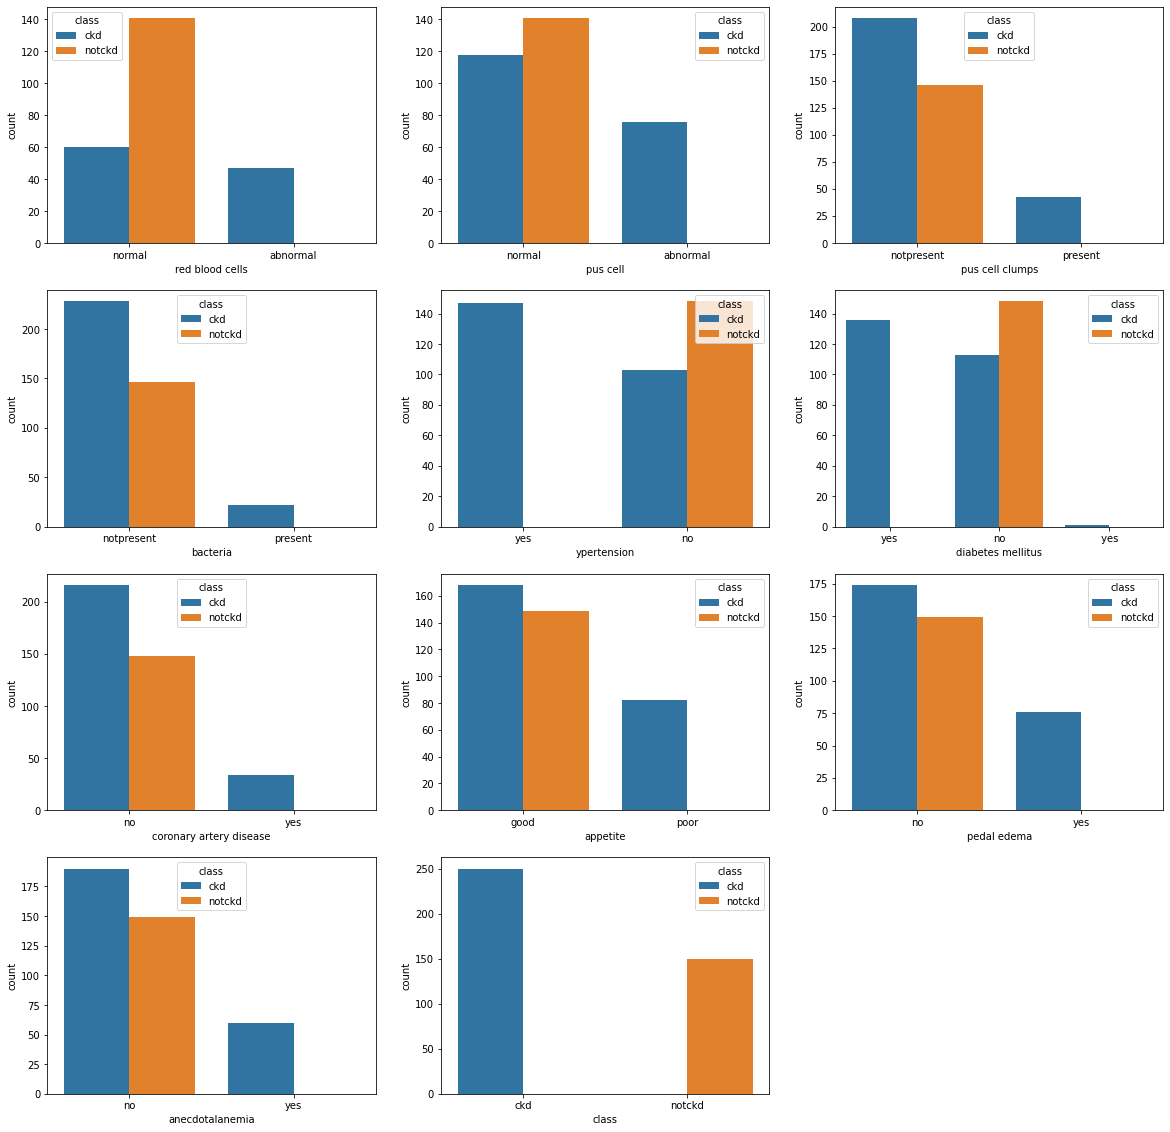

In [160]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(kidney[feature],hue=kidney['class'])

<AxesSubplot:xlabel='class', ylabel='count'>

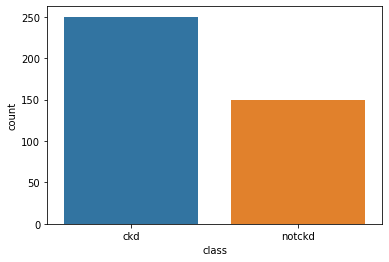

In [161]:
sns.countplot(kidney['class'])

## Correlation between features

In [162]:
kidney.corr()

age  blood pressure  specific gravity   albumin  \
age                     1.000000        0.159480         -0.191096  0.122091   
blood pressure          0.159480        1.000000         -0.218836  0.160689   
specific gravity       -0.191096       -0.218836          1.000000 -0.469760   
albumin                 0.122091        0.160689         -0.469760  1.000000   
sugar                   0.220866        0.222576         -0.296234  0.269305   
bgr                     0.244992        0.160193         -0.374710  0.379464   
bu                      0.196985        0.188517         -0.314295  0.453528   
sc                      0.132531        0.146222         -0.361473  0.399198   
sod                    -0.100046       -0.116422          0.412190 -0.459896   
pot                     0.058377        0.075151         -0.072787  0.129038   
hemo                   -0.192928       -0.306540          0.602582 -0.634632   
packed cell volume     -0.242119       -0.326319          0.603560 -0.611891   
white blood cell count  0.118339        0.029753         -0.236215  0.231989   
red blood cell count   -0.268896       -0.261936          0.579476 -0.566437   

                           sugar       bgr        bu        sc       sod  \
age                     0.220866  0.244992  0.196985  0.132531 -0.100046   
blood pressure          0.222576  0.160193  0.188517  0.146222 -0.116422   
specific gravity       -0.296234 -0.374710 -0.314295 -0.361473  0.412190   
albumin                 0.269305  0.379464  0.453528  0.399198 -0.459896   
sugar                   1.000000  0.717827  0.168583  0.223244 -0.131776   
bgr                     0.717827  1.000000  0.143322  0.114875 -0.267848   
bu                      0.168583  0.143322  1.000000  0.586368 -0.323054   
sc                      0.223244  0.114875  0.586368  1.000000 -0.690158   
sod                    -0.131776 -0.267848 -0.323054 -0.690158  1.000000   
pot                     0.219450  0.066966  0.357049  0.326107  0.097887   
hemo                   -0.224775 -0.306189 -0.610360 -0.401670  0.365183   
packed cell volume     -0.239189 -0.301385 -0.607621 -0.404193  0.376914   
white blood cell count  0.184893  0.150015  0.050462 -0.006390  0.007277   
red blood cell count   -0.237448 -0.281541 -0.579087 -0.400852  0.344873   

                             pot      hemo  packed cell volume  \
age                     0.058377 -0.192928           -0.242119   
blood pressure          0.075151 -0.306540           -0.326319   
specific gravity       -0.072787  0.602582            0.603560   
albumin                 0.129038 -0.634632           -0.611891   
sugar                   0.219450 -0.224775           -0.239189   
bgr                     0.066966 -0.306189           -0.301385   
bu                      0.357049 -0.610360           -0.607621   
sc                      0.326107 -0.401670           -0.404193   
sod                     0.097887  0.365183            0.376914   
pot                     1.000000 -0.133746           -0.163182   
hemo                   -0.133746  1.000000            0.895382   
packed cell volume     -0.163182  0.895382            1.000000   
white blood cell count -0.105576 -0.169413           -0.197022   
red blood cell count   -0.158309  0.798880            0.791625   

                        white blood cell count  red blood cell count  
age                                   0.118339             -0.268896  
blood pressure                        0.029753             -0.261936  
specific gravity                     -0.236215              0.579476  
albumin                               0.231989             -0.566437  
sugar                                 0.184893             -0.237448  
bgr                                   0.150015             -0.281541  
bu                                    0.050462             -0.579087  
sc                                   -0.006390             -0.400852  
sod                                   0.007277           

<AxesSubplot:>

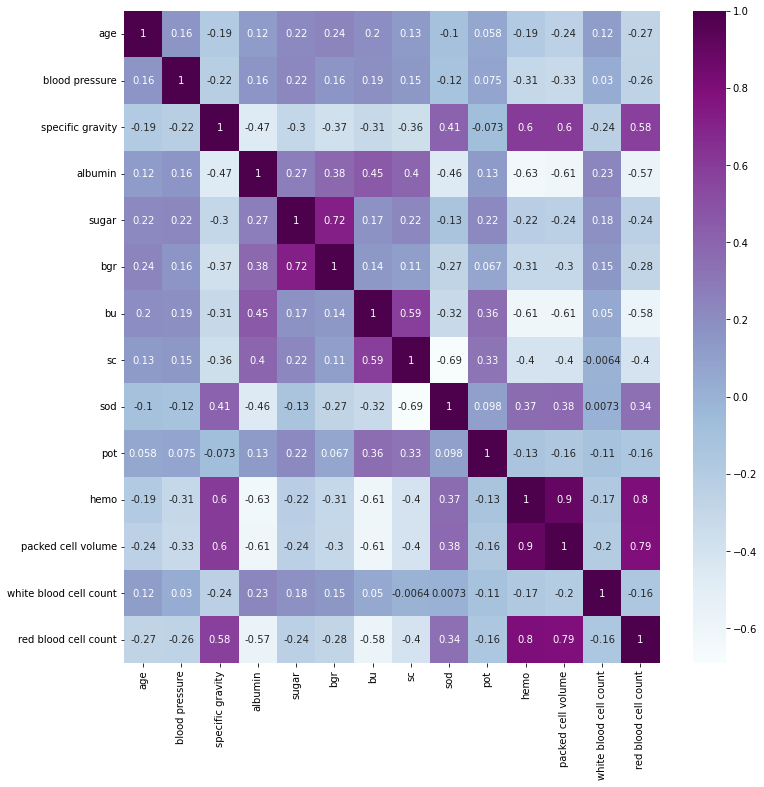

In [163]:
plt.figure(figsize=(12,12))
sns.heatmap(kidney.corr(method='pearson'),cbar=True,cmap='BuPu',annot=True)

* Rbc count is positively correlated with specific gravity,haemoglobin,packed cell volume
* Rbc count is negatively correlated with albumin, blood urea
* Packed cell volume and haemoglobin are highly positive correlated
* Packed cell volume is negatively correlated with albumin and blood urea
* haemoglobin and albumin are negatively correlated

In [164]:
kidney.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

We can observe that when a person is not diseased its rbc count is 134, mean is also high whereas when he is diseased count drop downs to 25-40 and mean is low.

#### Relationship between haemoglobin and packed cell volume

Text(0.5, 1.0, 'Relationship between haemoglobin and packed cell volume')

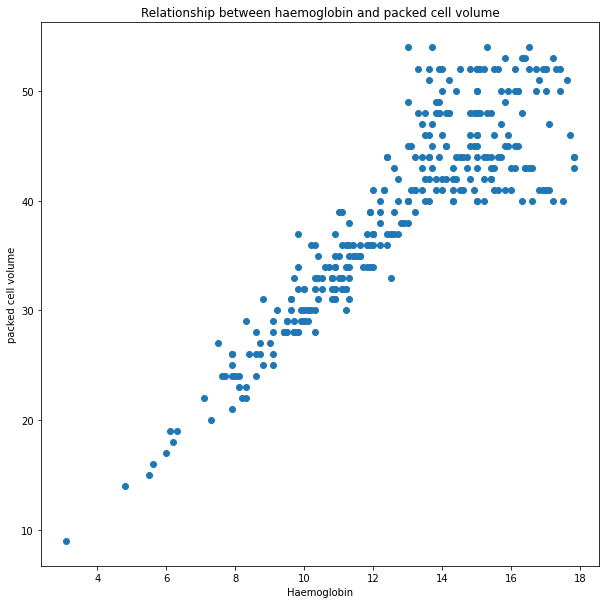

In [165]:
plt.figure(figsize=(10,10))
plt.scatter(x=kidney.hemo,y=kidney['packed cell volume'])
plt.xlabel('Haemoglobin')
plt.ylabel('packed cell volume')
plt.title('Relationship between haemoglobin and packed cell volume')


We can see that there is a linear relationship between haemoglobin and pacled cell volume

### Analyse distribution of red blood cell count chronic as well as non chronic

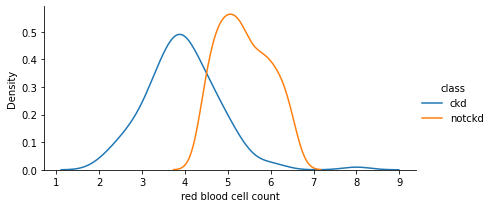

In [166]:
grid=sns.FacetGrid(kidney,hue='class',aspect=2)
grid.map(sns.kdeplot,'red blood cell count')
grid.add_legend()

from above visuals we can say that person with lower rbc count have high chances of having chronic disease

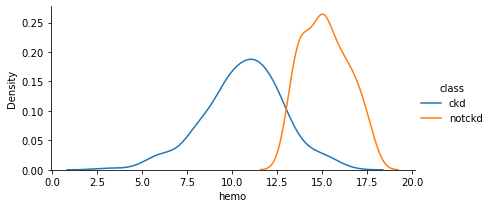

In [167]:
grid=sns.FacetGrid(kidney,hue='class',aspect=2)
grid.map(sns.kdeplot,'hemo')
grid.add_legend()

Text(0.5, 1.0, 'Relationship between red blood cell count and packed cell volume')

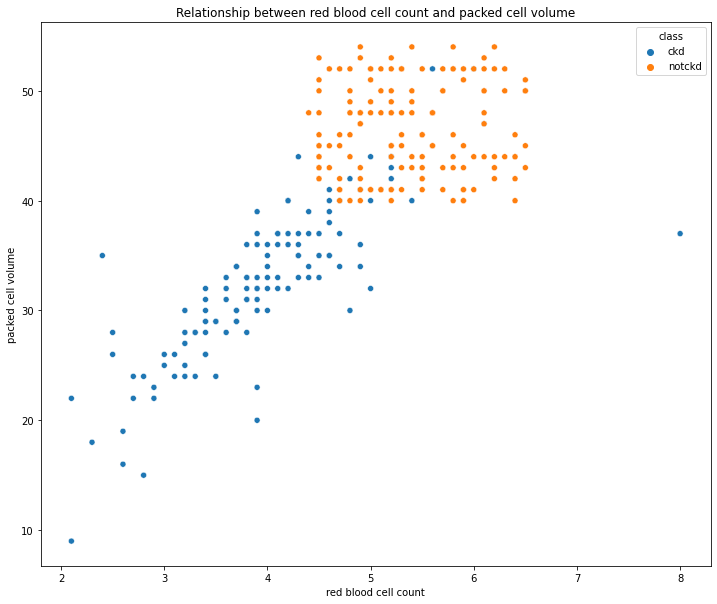

In [168]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=kidney['red blood cell count'],y=kidney['packed cell volume'],hue=kidney['class'])
plt.xlabel('red blood cell count')
plt.ylabel('packed cell volume')
plt.title('Relationship between red blood cell count and packed cell volume')


Text(0.5, 1.0, 'Relationship between haemoglobin and red blood cell count')

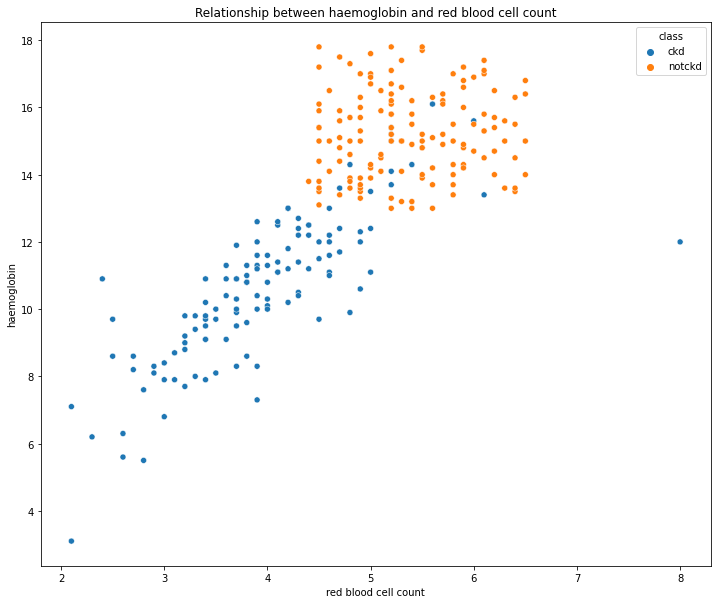

In [169]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=kidney['red blood cell count'],y=kidney['hemo'],hue=kidney['class'])
plt.xlabel('red blood cell count')
plt.ylabel('haemoglobin')
plt.title('Relationship between haemoglobin and red blood cell count')

* We can see that there is some kind of linearity in all the relationships
* Whenever haemoglobin is below 13-14 he is positive for chronic disease , Whenever haemoglobin is near 18 he is negative

## Handling Missing Values

In [170]:
kidney.isnull().sum()

age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
bgr                         44
bu                          19
sc                          17
sod                         87
pot                         88
hemo                        52
packed cell volume          71
white blood cell count     106
red blood cell count       131
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anecdotalanemia              1
class                        0
dtype: int64

In [171]:
kidney.isnull().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
pot                         88
sod                         87
packed cell volume          71
pus cell                    65
hemo                        52
sugar                       49
specific gravity            47
albumin                     46
bgr                         44
bu                          19
sc                          17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anecdotalanemia              1
class                        0
dtype: int64

We can fill this missing values with mean,median or std deviat

<AxesSubplot:xlabel='class', ylabel='age'>

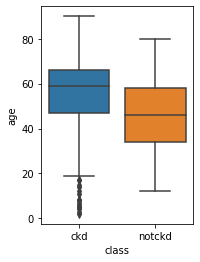

In [37]:
plt.subplot(1,2,1)
sns.boxplot(x=kidney['class'],y=kidney['age'])

In [172]:
list(enumerate(cat_col))

[(0, 'red blood cells'),
 (1, 'pus cell'),
 (2, 'pus cell clumps'),
 (3, 'bacteria'),
 (4, 'ypertension'),
 (5, 'diabetes mellitus'),
 (6, 'coronary artery disease'),
 (7, 'appetite'),
 (8, 'pedal edema'),
 (9, 'anecdotalanemia'),
 (10, 'class')]

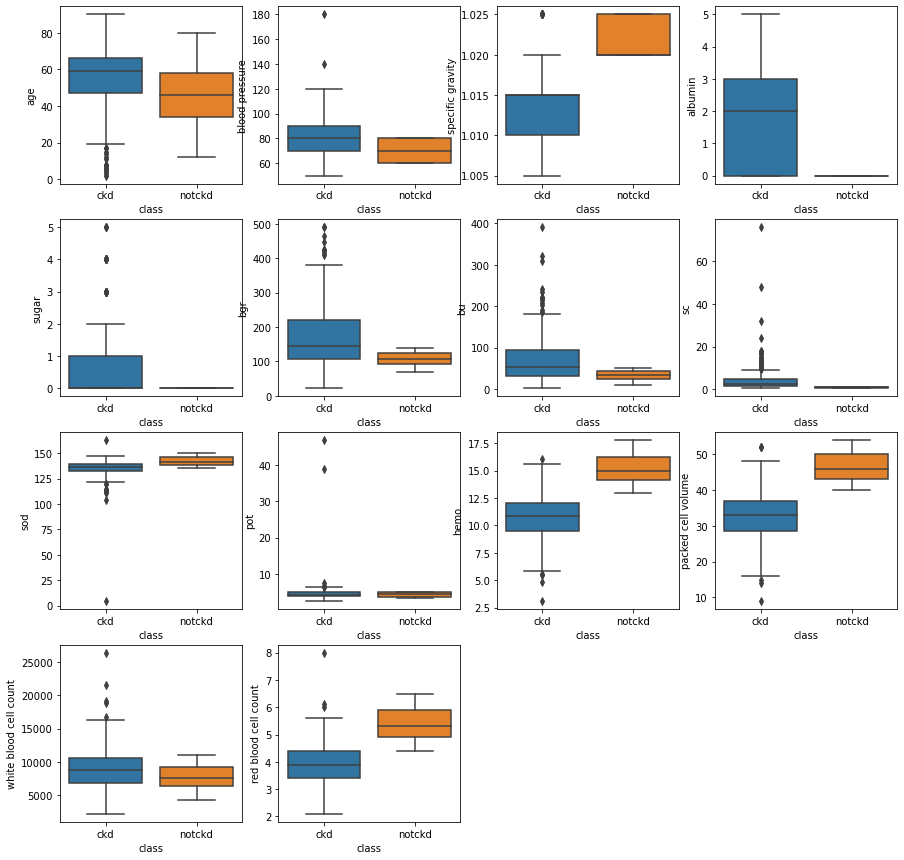

In [173]:
plt.figure(figsize=(15,15))
for i in enumerate(num_col):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x=kidney['class'],y=i[1],data=kidney.reset_index())

there are outliers in dataset so filling missing values with mean is not feasible , i will use median to fill missing values

In [174]:
np.mean(kidney)

age                         51.483376
blood pressure              76.469072
specific gravity             1.017408
albumin                      1.016949
sugar                        0.450142
bgr                        148.036517
bu                          57.425722
sc                           3.072454
sod                        137.528754
pot                          4.627244
hemo                        12.526437
packed cell volume          38.884498
white blood cell count    8406.122449
red blood cell count         4.707435
dtype: float64

In [175]:
kidney.isnull().sum()

age                          9
blood pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
bgr                         44
bu                          19
sc                          17
sod                         87
pot                         88
hemo                        52
packed cell volume          71
white blood cell count     106
red blood cell count       131
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anecdotalanemia              1
class                        0
dtype: int64

In [176]:
for i in num_col:
    kidney[i].fillna(kidney[i].median(),inplace=True)

In [177]:
kidney.isnull().sum()

age                          0
blood pressure               0
specific gravity             0
albumin                      0
sugar                        0
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
bgr                          0
bu                           0
sc                           0
sod                          0
pot                          0
hemo                         0
packed cell volume           0
white blood cell count       0
red blood cell count         0
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anecdotalanemia              1
class                        0
dtype: int64

In [178]:
kidney.describe()

age  blood pressure  specific gravity    albumin       sugar  \
count  400.000000      400.000000        400.000000  400.00000  400.000000   
mean    51.562500       76.575000          1.017712    0.90000    0.395000   
std     16.982996       13.489785          0.005434    1.31313    1.040038   
min      2.000000       50.000000          1.005000    0.00000    0.000000   
25%     42.000000       70.000000          1.015000    0.00000    0.000000   
50%     55.000000       80.000000          1.020000    0.00000    0.000000   
75%     64.000000       80.000000          1.020000    2.00000    0.000000   
max     90.000000      180.000000          1.025000    5.00000    5.000000   

              bgr          bu          sc         sod         pot       hemo  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.00000   
mean   145.062500   56.693000    2.997125  137.631250    4.577250   12.54250   
std     75.260774   49.395258    5.628886    9.206332    2.821357    2.71649   
min     22.000000    1.500000    0.400000    4.500000    2.500000    3.10000   
25%    101.000000   27.000000    0.900000  135.000000    4.000000   10.87500   
50%    121.000000   42.000000    1.300000  138.000000    4.400000   12.65000   
75%    150.000000   61.750000    2.725000  141.000000    4.800000   14.62500   
max    490.000000  391.000000   76.000000  163.000000   47.000000   17.80000   

       packed cell volume  white blood cell count  red blood cell count  
count          400.000000              400.000000            400.000000  
mean            39.082500             8298.500000              4.737750  
std              8.162245             2529.593814              0.841439  
min              9.000000             2200.000000              2.100000  
25%             34.000000             6975.000000              4.500000  
50%             40.000000             8000.000000              4.800000  
75%             44.000000             9400.000000              5.100000  
max             54.000000            26400.000000              8.000000

## Filling missing values in categorical columns using random values

It was more important to find the missing values and need to clean thos emissing values by using different menthods. ( I've dropped the NULL Values ). Missing Values leads to False Output and sometimes cause many Problems while Evaluating our Model.


In [179]:
kidney['red blood cells'].isnull().sum()

152

In [180]:
random_sample=kidney['red blood cells'].dropna().sample(152)

In [181]:
random_sample

251    normal
288    normal
259    normal
249    normal
34     normal
        ...  
292    normal
301    normal
275    normal
286    normal
384    normal
Name: red blood cells, Length: 152, dtype: object

In [182]:
kidney[kidney['red blood cells'].isnull()].index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [183]:
random_sample.index

Int64Index([251, 288, 259, 249,  34, 379, 375, 256, 177,  36,
            ...
            287, 339, 221, 204,  35, 292, 301, 275, 286, 384],
           dtype='int64', length=152)

We can see that indexes are different , while putting random values indexes must be equal

In [184]:
random_sample.index =kidney[kidney['red blood cells'].isnull()].index   #in this way index will be equal

In [185]:
random_sample.index

Int64Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
            ...
            245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
           dtype='int64', length=152)

In [186]:
kidney.loc[kidney['red blood cells'].isnull(),'red blood cells']=random_sample

In [187]:
kidney.head()

age  blood pressure  specific gravity  albumin  sugar red blood cells  \
0  48.0            80.0             1.020      1.0    0.0          normal   
1   7.0            50.0             1.020      4.0    0.0          normal   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus cell pus cell clumps    bacteria    bgr  ...  packed cell volume  \
0    normal      notpresent  notpresent  121.0  ...                44.0   
1    normal      notpresent  notpresent  121.0  ...                38.0   
2    normal      notpresent  notpresent  423.0  ...                31.0   
3  abnormal         present  notpresent  117.0  ...                32.0   
4    normal      notpresent  notpresent  106.0  ...                35.0   

   white blood cell count  red blood cell count  ypertension  \
0                  7800.0                   5.2          yes   
1                  6000.0                   4.8           no   
2                  7500.0                   4.8           no   
3                  6700.0                   3.9          yes   
4                  7300.0                   4.6           no   

   diabetes mellitus  coronary artery disease  appetite  pedal edema  \
0                yes                       no      good           no   
1                 no                       no      good           no   
2                yes                       no      poor           no   
3                 no                       no      poor          yes   
4                 no                       no      good           no   

  anecdotalanemia class  
0              no   ckd  
1              no   ckd  
2             yes   ckd  
3             yes   ckd  
4              no   ckd  

[5 rows x 25 columns]

In [188]:
kidney['red blood cells'].isnull().sum()

0

<AxesSubplot:xlabel='red blood cells', ylabel='count'>

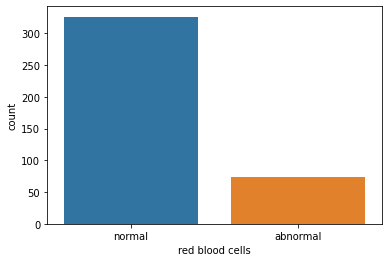

In [189]:
sns.countplot(kidney['red blood cells'])       # checking that ratio didnt change after filling missing values

ratio didnt changed

In [190]:
#filling random values in all categorical columns
def Random_value_Imputation(feature):
    random_sample=kidney[feature].dropna().sample(kidney[feature].isnull().sum())
    random_sample.index=kidney[kidney[feature].isnull()].index
    kidney.loc[kidney[feature].isnull(),feature]=random_sample

In [191]:
Random_value_Imputation('pus cell')     #only this column because it has higher no. of missing value

In [192]:
kidney.isnull().sum()

age                        0
blood pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            4
bacteria                   4
bgr                        0
bu                         0
sc                         0
sod                        0
pot                        0
hemo                       0
packed cell volume         0
white blood cell count     0
red blood cell count       0
ypertension                2
diabetes mellitus          2
coronary artery disease    2
appetite                   1
pedal edema                1
anecdotalanemia            1
class                      0
dtype: int64

Those categorical variables who have less no. of missing values then we can replace it with mode

In [193]:
def impute_mode(feature):
    mode=kidney[feature].mode()[0]
    kidney[feature]=kidney[feature].fillna(mode)

In [194]:
for col in cat_col:
    impute_mode(col)

In [195]:
kidney[cat_col].isnull().sum()

red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anecdotalanemia            0
class                      0
dtype: int64

In [196]:
kidney.isnull().sum()

age                        0
blood pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
bgr                        0
bu                         0
sc                         0
sod                        0
pot                        0
hemo                       0
packed cell volume         0
white blood cell count     0
red blood cell count       0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anecdotalanemia            0
class                      0
dtype: int64

We can see that there is no missing value now

## Performing the Feature Encoding

Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

In [197]:
for col in cat_col:
    print('{} has {} categories'.format(col,kidney[col].nunique()))

red blood cells has 2 categories
pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 3 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anecdotalanemia has 2 categories
class has 2 categories


## Label Encoding  ---> Because there are less no. of categories in each column

### LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Fit label encoder.

- normal -- 0
- abnormal --1

In [198]:
 from sklearn.preprocessing import LabelEncoder

In [199]:
le=LabelEncoder()

In [200]:
for col in cat_col:
    kidney[col]=le.fit_transform(kidney[col])

In [201]:
kidney.head()

age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

   pus cell  pus cell clumps  bacteria    bgr  ...  packed cell volume  \
0         1                0         0  121.0  ...                44.0   
1         1                0         0  121.0  ...                38.0   
2         1                0         0  423.0  ...                31.0   
3         0                1         0  117.0  ...                32.0   
4         1                0         0  106.0  ...                35.0   

   white blood cell count  red blood cell count  ypertension  \
0                  7800.0                   5.2            1   
1                  6000.0                   4.8            0   
2                  7500.0                   4.8            0   
3                  6700.0                   3.9            1   
4                  7300.0                   4.6            0   

   diabetes mellitus  coronary artery disease  appetite  pedal edema  \
0                  2                        0         0            0   
1                  1                        0         0            0   
2                  2                        0         1            0   
3                  1                        0         1            1   
4                  1                        0         0            0   

   anecdotalanemia  class  
0                0      0  
1                0      0  
2                1      0  
3                1      0  
4                0      0  

[5 rows x 25 columns]

## Selecting important features

- **SelectKBest**: Feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable. The classes in the sklearn.

- **chi2**: A chi-square (χ2) statistic is a test that measures how a model compares to actual observed data. ... The chi-square statistic compares the size any discrepancies between the expected results and the actual results, given the size of the sample and the number of variables in the relationship.

![image](https://media.geeksforgeeks.org/wp-content/uploads/20190318131202/chi2-form.jpg)

In [202]:
from sklearn.feature_selection import SelectKBest

In [203]:
from sklearn.feature_selection import chi2

In [204]:
ind_col=[col for col in kidney.columns if col!='class']
dep_col='class'

In [205]:
X=kidney[ind_col]
y=kidney[dep_col]

In [206]:
X.head()

age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

   pus cell  pus cell clumps  bacteria    bgr  ...  hemo  packed cell volume  \
0         1                0         0  121.0  ...  15.4                44.0   
1         1                0         0  121.0  ...  11.3                38.0   
2         1                0         0  423.0  ...   9.6                31.0   
3         0                1         0  117.0  ...  11.2                32.0   
4         1                0         0  106.0  ...  11.6                35.0   

   white blood cell count  red blood cell count  ypertension  \
0                  7800.0                   5.2            1   
1                  6000.0                   4.8            0   
2                  7500.0                   4.8            0   
3                  6700.0                   3.9            1   
4                  7300.0                   4.6            0   

   diabetes mellitus  coronary artery disease  appetite  pedal edema  \
0                  2                        0         0            0   
1                  1                        0         0            0   
2                  2                        0         1            0   
3                  1                        0         1            1   
4                  1                        0         0            0   

   anecdotalanemia  
0                0  
1                0  
2                1  
3                1  
4                0  

[5 rows x 24 columns]

In [207]:
imp_features=SelectKBest(score_func=chi2,k=20)

In [208]:
imp_features=imp_features.fit(X,y)

In [209]:
imp_features

SelectKBest(k=20, score_func=<function chi2 at 0x00000234B6D4D040>)

In [210]:
imp_features.scores_

array([1.15859940e+02, 8.17867015e+01, 5.03531613e-03, 2.16000000e+02,
       9.48000000e+01, 9.36523517e+00, 1.55463203e+01, 2.52000000e+01,
       1.32000000e+01, 2.24165129e+03, 2.34309714e+03, 3.57792101e+02,
       2.75587488e+01, 2.95133869e+00, 1.23856342e+02, 3.08181415e+02,
       9.70105039e+03, 1.91130252e+01, 8.82000000e+01, 2.04392523e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [211]:
datascore=pd.DataFrame(imp_features.scores_,columns=['Score'])

In [212]:
datascore

Score
0    115.859940
1     81.786701
2      0.005035
3    216.000000
4     94.800000
5      9.365235
6     15.546320
7     25.200000
8     13.200000
9   2241.651289
10  2343.097145
11   357.792101
12    27.558749
13     2.951339
14   123.856342
15   308.181415
16  9701.050391
17    19.113025
18    88.200000
19    20.439252
20    20.400000
21    49.200000
22    45.600000
23    36.000000

In [213]:
X.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anecdotalanemia'],
      dtype='object')

In [214]:
dfcols=pd.DataFrame(X.columns)

In [215]:
dfcols

0
0                       age
1            blood pressure
2          specific gravity
3                   albumin
4                     sugar
5           red blood cells
6                  pus cell
7           pus cell clumps
8                  bacteria
9                       bgr
10                       bu
11                       sc
12                      sod
13                      pot
14                     hemo
15       packed cell volume
16   white blood cell count
17     red blood cell count
18              ypertension
19        diabetes mellitus
20  coronary artery disease
21                 appetite
22              pedal edema
23          anecdotalanemia

In [216]:
features_rank=pd.concat([dfcols,datascore],axis=1)
features_rank

0        Score
0                       age   115.859940
1            blood pressure    81.786701
2          specific gravity     0.005035
3                   albumin   216.000000
4                     sugar    94.800000
5           red blood cells     9.365235
6                  pus cell    15.546320
7           pus cell clumps    25.200000
8                  bacteria    13.200000
9                       bgr  2241.651289
10                       bu  2343.097145
11                       sc   357.792101
12                      sod    27.558749
13                      pot     2.951339
14                     hemo   123.856342
15       packed cell volume   308.181415
16   white blood cell count  9701.050391
17     red blood cell count    19.113025
18              ypertension    88.200000
19        diabetes mellitus    20.439252
20  coronary artery disease    20.400000
21                 appetite    49.200000
22              pedal edema    45.600000
23          anecdotalanemia    36.000000

In [217]:
features_rank.columns=['features','score']

In [218]:
features_rank

features        score
0                       age   115.859940
1            blood pressure    81.786701
2          specific gravity     0.005035
3                   albumin   216.000000
4                     sugar    94.800000
5           red blood cells     9.365235
6                  pus cell    15.546320
7           pus cell clumps    25.200000
8                  bacteria    13.200000
9                       bgr  2241.651289
10                       bu  2343.097145
11                       sc   357.792101
12                      sod    27.558749
13                      pot     2.951339
14                     hemo   123.856342
15       packed cell volume   308.181415
16   white blood cell count  9701.050391
17     red blood cell count    19.113025
18              ypertension    88.200000
19        diabetes mellitus    20.439252
20  coronary artery disease    20.400000
21                 appetite    49.200000
22              pedal edema    45.600000
23          anecdotalanemia    36.000000

In [219]:
features_rank.nlargest(10,'score')

features        score
16  white blood cell count  9701.050391
10                      bu  2343.097145
9                      bgr  2241.651289
11                      sc   357.792101
15      packed cell volume   308.181415
3                  albumin   216.000000
14                    hemo   123.856342
0                      age   115.859940
4                    sugar    94.800000
18             ypertension    88.200000

In [220]:
selected=features_rank.nlargest(10,'score')['features'].values

In [221]:
selected

array(['white blood cell count', 'bu', 'bgr', 'sc', 'packed cell volume',
       'albumin', 'hemo', 'age', 'sugar', 'ypertension'], dtype=object)

In [88]:
X_new=kidney[selected]

In [222]:
X_new.head()

white blood cell count    bu    bgr   sc  packed cell volume  albumin  \
0                  7800.0  36.0  121.0  1.2                44.0      1.0   
1                  6000.0  18.0  121.0  0.8                38.0      4.0   
2                  7500.0  53.0  423.0  1.8                31.0      2.0   
3                  6700.0  56.0  117.0  3.8                32.0      4.0   
4                  7300.0  26.0  106.0  1.4                35.0      2.0   

   hemo   age  sugar  ypertension  
0  15.4  48.0    0.0            1  
1  11.3   7.0    0.0            0  
2   9.6  62.0    3.0            0  
3  11.2  48.0    0.0            1  
4  11.6  51.0    0.0            0

In [223]:
len(X_new)

400

In [224]:
X_new.shape

(400, 10)

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,random_state=0,test_size=0.3)

In [228]:
X_train.shape

(280, 10)

In [229]:
y_train.value_counts()    #Checking for imbalancing

0    178
1    102
Name: class, dtype: int64

# XGBoost Classifier - For our Model

- XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

![image](https://miro.medium.com/max/1400/1*FLshv-wVDfu-i54OqvZdHg.png)

## Since we are using XGBoost , feature scaling is not required

In [230]:
from xgboost import XGBClassifier

In [231]:
params={'learning-rate':[0,0.5,0.20,0.25],
        'max_depth':[5,8,10],
       'min_child_weight':[1,3,5,7],
       'gamma':[0.0,0.1,0.2,0.4],
       'colsample_bytree':[0.3,0.4,0.7]}

**RandomizedSearchCV** :Randomized search on hyper parameters. RandomizedSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

![image](https://miro.medium.com/max/1000/1*9W1MrRkHi0YFmBoHi9Y2Ow.png)

In [232]:
from sklearn.model_selection import RandomizedSearchCV

In [233]:
classifier=XGBClassifier()

In [234]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [235]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[20:01:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "learning-rate" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                

In [236]:
random_search.best_estimator_    #Checking for best model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning-rate=0,
              learning_rate=0.300000012, max_bin=256, max_cat_threshold=64,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=8, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto', ...)

In [237]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning-rate': 0,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [238]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='', learning_rate=0.300000012, max_delta_step=0,
              max_depth=5, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [239]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy='depthwise', importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=8, num_parallel_tree=1, predictor='auto', random_state=0, ...)

# Let's Predict our model Accuracy.

In [240]:
ypred=classifier.predict(X_test)

In [241]:
ypred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [242]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [243]:
confusion_matrix(y_test,ypred)

array([[70,  2],
       [ 0, 48]], dtype=int64)

In [244]:
gbacc =accuracy_score(y_test,ypred)
gbacc=gbacc*100
print("The accuracy of XGBoost:",gbacc)

The accuracy of XGBoost: 98.33333333333333


In [245]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       0.96      1.00      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [246]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [247]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
le=LogisticRegression()
le.fit(x_train,y_train)
pred=le.predict(x_test)

In [248]:
from sklearn.metrics import accuracy_score
aclr=accuracy_score(y_test,pred)
aclr=aclr*100
print("The accuracy of logistic regression:",aclr)

The accuracy of logistic regression: 97.5


In [249]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        72
           1       0.94      1.00      0.97        48

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



In [250]:
from sklearn.svm import SVC
clf= SVC()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
clf.score(X_test, y_test)

0.6

In [251]:
acrf=accuracy_score(y_test,y_pred)
acrf=acrf*100
print("The accuracy of support vector classifier:",acrf)

The accuracy of support vector classifier: 60.0


In [252]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        72
           1       0.00      0.00      0.00        48

    accuracy                           0.60       120
   macro avg       0.30      0.50      0.37       120
weighted avg       0.36      0.60      0.45       120



In [253]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(X_train,y_train)
predkn=dec.predict(X_test)
predkn

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [254]:
ackn=accuracy_score(y_test,predkn)
ackn=ackn*100
print("The accuracy of decision tree:",ackn)

The accuracy of decision tree: 95.83333333333334


In [255]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       0.96      1.00      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [256]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
prednb=gnb.predict(X_test)
prednb

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [257]:
acnb=accuracy_score(y_test,prednb)
acnb=acnb*100
print("Thre accuracy of naivebayes:",acnb)

Thre accuracy of naivebayes: 95.83333333333334


In [258]:
print(classification_report(y_test, prednb,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        72
           1       0.91      1.00      0.95        48

    accuracy                           0.96       120
   macro avg       0.95      0.97      0.96       120
weighted avg       0.96      0.96      0.96       120



In [259]:
from sklearn.ensemble import RandomForestClassifier

In [260]:
x = RandomForestClassifier(n_estimators = 20)
x.fit(X_train, y_train)
yypred=x.predict(X_test)
a= accuracy_score(y_test,yypred)
a=a*100
print(a)

96.66666666666667


In [261]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       0.96      1.00      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [262]:
model=pd.DataFrame({'lg':aclr,'svc':acrf,'dec':ackn,'nb':acnb,'gb':gbacc,'rf':a},index=[0])
print(model)


     lg   svc        dec         nb         gb         rf
0  97.5  60.0  95.833333  95.833333  98.333333  96.666667


In [263]:
models=list(model.keys())
scores=[aclr,acrf,ackn,acnb,gbacc,a]

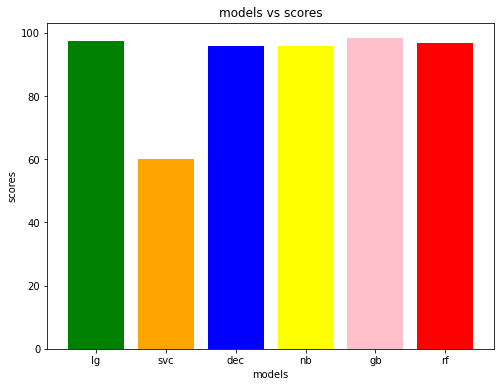

In [264]:
fig=plt.figure(figsize=(8,6))
plt.bar(models,scores,color=['green','orange','blue','yellow','pink','red'],width=0.8)
plt.xlabel('models')
plt.ylabel('scores')
plt.title('models vs scores')
plt.show()

<div class="alert alert-success" markdown="1">

> As we Performed all the Methods and Trained our Model using different Menthods

# We Got Very Good Accuracy Using XGBoost - 98% Accuracy

</div>